In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report


In [3]:
import pandas as pd

In [57]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install pyreadstat


   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
    --------------------------------------- 0.0/2.4 MB 960.0 kB/s eta 0:00:03
    --------------------------------------- 0.1/2.4 MB 650.2 kB/s eta 0:00:04
   - -------------------------------------- 0.1/2.4 MB 737.3 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/2.4 MB 714.4 kB/s eta 0:00:04
   --- ------------------------------------ 0.2/2.4 MB 794.9 kB/s eta 0:00:03
   ---- ----------------------------------- 0.3/2.4 MB 907.8 kB/s eta 0:00:03
   ----- ---------------------------------- 0.3/2.4 MB 981.5 kB/s eta 0:00:03
   ------ --------------------------------- 0.4/2.4 MB 1.0 MB/s eta 0:00:03
   ------- -------------------------------- 0.5/2.4 MB 1.1 MB/s eta 0:00:02
   -------- ------------------------------- 0.5/2.4 MB 1.2 MB/s eta 0:00:02
   --------- ------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
import pyreadstat

file_path = r"C:\Users\hp\Downloads\parkinsons_model.sav"
df, meta = pyreadstat.read_sav(file_path)

print(df.head())  # Display first few rows


ReadstatError: Invalid file, or file has unsupported features

In [6]:
parkinsons_dataset = pd.read_csv(r"c:\Users\hp\Downloads\parkinsons_model.sav")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

In [60]:
parkinsons_dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [61]:
parkinsons_dataset.shape

(195, 24)

In [62]:
parkinsons_dataset.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [63]:
parkinsons_dataset['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [64]:
x = parkinsons_dataset.drop(columns=['status','name'],axis=1)
y = parkinsons_dataset['status']

In [65]:
print(len(x))  # Length of the features
print(len(y))

195
195


In [66]:
print(x.isnull().sum())  # Check if there are missing values in X
print(y.isnull().sum()) 

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64
0


In [67]:
x.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [68]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [69]:
x_train.shape

(156, 22)

In [70]:
x_test.shape

(39, 22)

In [71]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  RPDE              195 non-null    float64
 1

In [72]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
from imblearn.under_sampling import TomekLinks

tomek = TomekLinks()
X_resampled, y_resampled = tomek.fit_resample(x_train, y_train)


In [74]:
print(pd.Series(y_train).value_counts())

status
1    115
0     41
Name: count, dtype: int64


In [75]:
print(pd.Series(y_resampled).value_counts())

status
1    110
0     41
Name: count, dtype: int64


SNM 

In [76]:
model = svm.SVC(kernel='linear')

In [103]:
model.fit(X_resampled,y_resampled)

SVC(kernel='linear')

In [104]:
y_resa_pred=model.predict(x_test)

In [105]:
print(accuracy_score(y_test,y_resa_pred))

0.8974358974358975


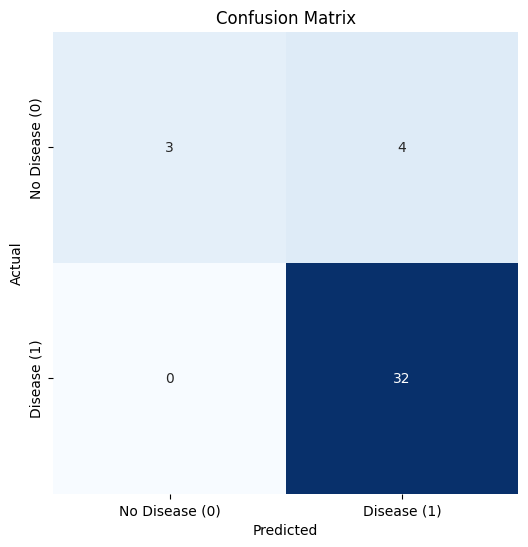

In [106]:
cm = confusion_matrix(y_test, y_resa_pred)
# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=['No Disease (0)', 'Disease (1)'], yticklabels=['No Disease (0)', 'Disease (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [107]:
precision = precision_score(y_test, y_resa_pred)
recall = recall_score(y_test, y_resa_pred)
print(precision)
print(recall)

0.8888888888888888
1.0


DecisionTreeClassifier

In [83]:
from sklearn.tree import DecisionTreeClassifier

clf_gini =DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0) 



In [84]:
clf_gini.fit(X_resampled,y_resampled)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [85]:
y_re_pred=clf_gini.predict(x_test)

In [86]:
print(accuracy_score(y_test,y_re_pred))

0.8974358974358975


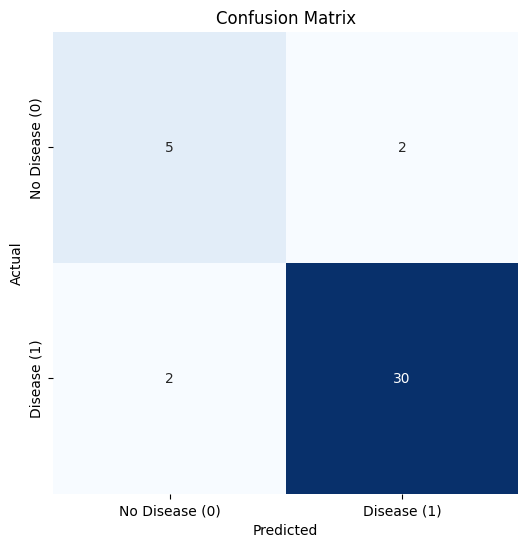

In [87]:
cm = confusion_matrix(y_test, y_re_pred)
# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=['No Disease (0)', 'Disease (1)'], yticklabels=['No Disease (0)', 'Disease (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [88]:
precision = precision_score(y_test, y_re_pred)
recall = recall_score(y_test, y_re_pred)
print(precision)
print(recall)

0.9375
0.9375


RandomForest

In [89]:
rf_model = RandomForestClassifier(random_state=42)


In [90]:
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [91]:
y_rf_re_pred = rf_model.predict(x_test)

In [92]:
print(accuracy_score(y_test,y_rf_re_pred))

0.9230769230769231


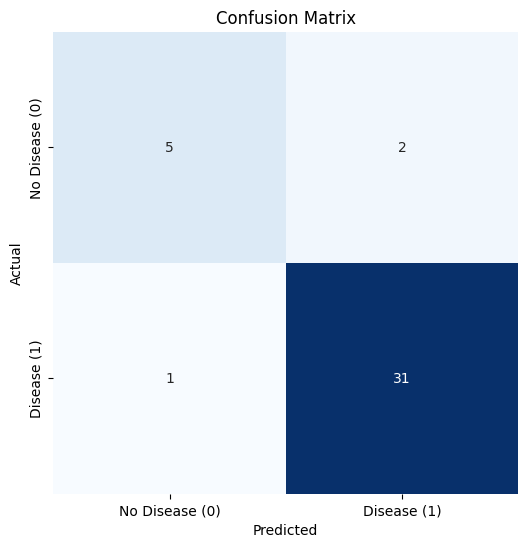

In [93]:
cm = confusion_matrix(y_test, y_rf_re_pred)
# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=['No Disease (0)', 'Disease (1)'], yticklabels=['No Disease (0)', 'Disease (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [94]:
precision = precision_score(y_test, y_rf_re_pred)
recall = recall_score(y_test, y_rf_re_pred)
print(precision)
print(recall)

0.9393939393939394
0.96875


Logistic

In [95]:

log_reg_model = LogisticRegression(random_state=42)




In [96]:
log_reg_model.fit(X_resampled,y_resampled)

c:\Users\jyots\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [97]:
y_lr_re_pred = log_reg_model.predict(x_test)

In [98]:
print(accuracy_score(y_test,y_lr_re_pred))

0.8974358974358975


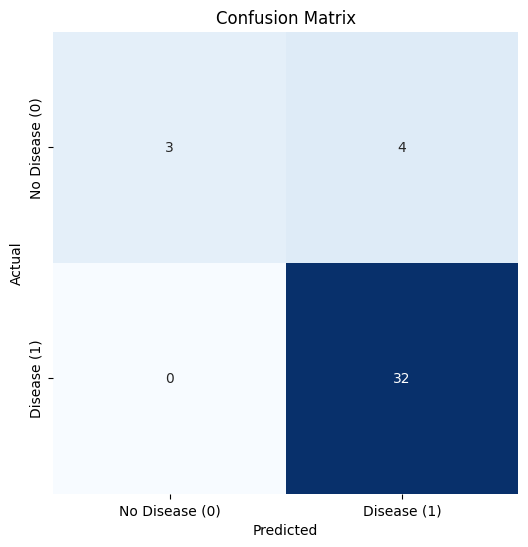

In [99]:
cm = confusion_matrix(y_test, y_lr_re_pred)
# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=['No Disease (0)', 'Disease (1)'], yticklabels=['No Disease (0)', 'Disease (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [100]:
precision = precision_score(y_test, y_lr_re_pred)
recall = recall_score(y_test, y_lr_re_pred)
print(precision)
print(recall)

0.8888888888888888
1.0


In [109]:
import pickle
filename = 'parkinsons_model.sav'
pickle.dump(rf_model, open(filename,'wb'))